In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import itertools

import sys
sys.path.append('../data/tecantaloupe/')

from growth.plate_spec import PlateSpec
from growth.plate_time_course_parser import SavageLabM1000Excel
from matplotlib import pyplot as plt

import seaborn as sns
import utils

matplotlib.rcParams.update({'font.size': 30})

In [2]:
def prepAndNormalize(ps,timecourse,cutoffTime):
    blanked = timecourse.blank()
    smoothed = blanked.smooth()
    data = smoothed.data_for_label('abs600')
    print('length of run: ' + str(max(data.time_s)/60/60))
    data=data[data.time_s<=cutoffTime*60*60]
    print('length after cut: ' + str(max(data.time_s)/60/60))
    yld = smoothed.GrowthYield(density_label='abs600')
    name2well = ps.name_to_well_mapping()

    yld = pd.DataFrame(yld, index=['yield']).T
    grouped_yld = yld.groupby(ps.well_to_name_mapping())
    mean_yield = grouped_yld.mean()
    
    normalized_yld = yld / mean_yield.loc['bw+pFE-sfGFP']
    normalized_mean_yld = normalized_yld.groupby(ps.well_to_name_mapping()).mean()
    normalized_std_yld = normalized_yld.groupby(ps.well_to_name_mapping()).std()
    return( (normalized_mean_yld,normalized_std_yld) )

length of run: 30.9041111111
length after cut: 23.8113888889
length of run: 29.6370555556

../data/tecantaloupe/growth/plate_time_course_parser.py:80: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  return clipped_df.convert_objects(convert_numeric=True)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



length after cut: 23.8109722222


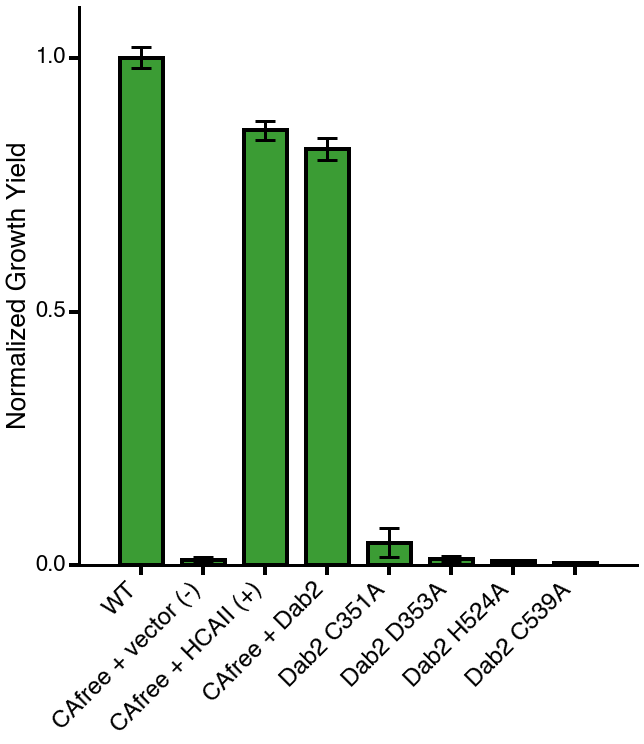

In [3]:
fig,ax = plt.subplots(figsize=(10,10))

colors = utils.qual_palette

pCol=colors[3]
nCol=colors[3]
eCol=colors[3]

# PlateSpec defined in CSV for easy editing
ps = PlateSpec.FromFile('../data/tecantaloupe/growth/plate_specs/2018_02_07_operon1CAFreeKnockInGrowth_metalKO_nice.csv')
parser = SavageLabM1000Excel()
timecourse = parser.ParseFromFilename('../data/tecantaloupe/growth/data/2018_02_09_CAFree_operon1_rescue_experiment_metal_KO_later.xlsx')
normalized_mean_yld,normalized_std_yld=prepAndNormalize(ps,timecourse,24)

#     print(normalized_mean_yld)

ps2 = PlateSpec.FromFile('../data/tecantaloupe/growth/plate_specs/2018_03_23_operon1CAFreeKnockInGrowth_metalandproton_nice.csv')
parser2 = SavageLabM1000Excel()
timecourse2 = parser2.ParseFromFilename('../data/tecantaloupe/growth/data/2018_03_24_CAFree_DAB2_protonWire.xlsx')
normalized_mean_yld2,normalized_std_yld2=prepAndNormalize(ps2,timecourse2,24)

#     print(data)
to_plot = [
    ('bw+pFE-sfGFP', 'WT'),
    ('CAF+pFE-sfGFP', 'CAfree + vector (-)'),
    ('CAF+pFE-HCA2', 'CAfree + HCAII (+)'),
    ('CAF+pFE-DAB2_wt', 'CAfree + Dab2'),
    ('CAF+pFE-DC351', 'Dab2 C351A'),
    ('CAF+pFE-DD353', 'Dab2 D353A'),
    ('CAF+pFE-DAB2+dHis1', 'Dab2 H524A'),
    ('CAF+pFE-DAB2+dCys1', 'Dab2 C539A'),


]

to_add=[
    'CAF+pFE-DC351',
    'CAF+pFE-DD353',
]

for label in to_add:
    m =normalized_mean_yld2.loc[label]
    normalized_mean_yld.ix[label]=m
    normalized_std_yld.ix[label]=normalized_std_yld2.loc[label]
#     print(normalized_mean_yld)

labels = [name for label, name in to_plot]
ylds = [normalized_mean_yld.loc[t[0]][0] for t in to_plot]
stds = [normalized_std_yld.loc[t[0]][0] for t in to_plot]

xs = np.arange(len(ylds))
plt.bar(xs, ylds, yerr=stds, color=pCol, align='center', ecolor='k', width=0.7, edgecolor='k',
        linewidth=4, capsize=10, error_kw={'capsize': 10, 'capthick': 3, 'elinewidth': 3})

plt.ylabel('Normalized Growth Yield', fontsize=26)

plt.xticks(xs, labels, rotation=45, fontsize=24, ha='right')
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
plt.yticks([0, 0.5, 1.0], fontsize=22)
plt.ylim(0.0, 1.1)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

plt.savefig('fig4/fig4A.eps',format='eps',bbox_inches='tight')
plt.show()

In [4]:
def getExcitationScan(filename):
    import numpy as np
    file = open(filename, 'r')
    graph = [line.split() for line in file if line[0].isdigit()]
    file.close()
    return(np.array([float(i[0]) for i in graph]),np.array([float(i[1]) for i in graph]))

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


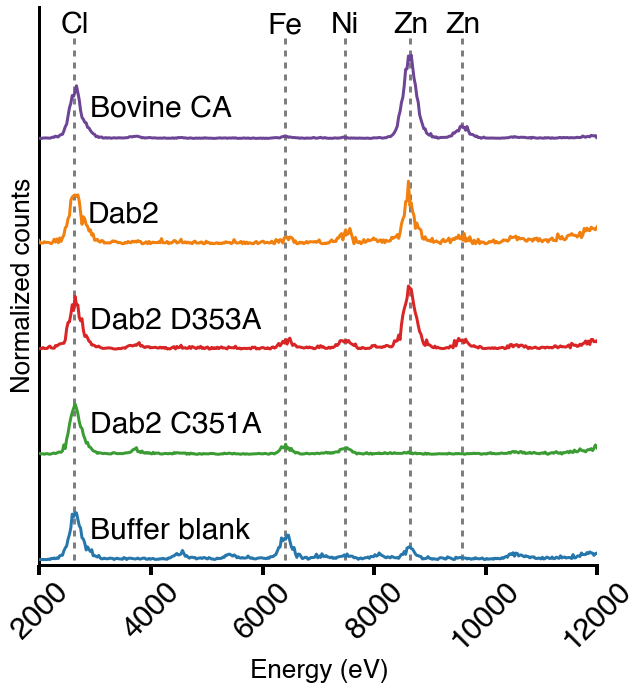

In [5]:
fig,ax = plt.subplots(figsize=(10,10), frameon=False)
ncolors = [colors[1],colors[3],colors[5],colors[7],colors[9]]
fileLoc = '../data/zincBindingFilesForPaper/'
plotOrder=['Buffer blank','Dab2 C351A','Dab2 D353A','Dab2','Bovine CA']
toPlot = [
    ['Acetone_BCA_Se_001.bip','Bovine CA'],
    ['Acetone_DAB2_SEDC_Se_001.bip','Dab2'],
    ['bufferBlank_02_Se_001.bip','Buffer blank'],
    ['bufferBlank_03_Se_001.bip','Buffer blank'],
    ['BCA_acetone.bip','Bovine CA'],
    ['DAB2_acetone_3.bip','Dab2'],
    ['DAB2_DC_his_acetone.bip','Dab2 C351A'],
    ['DAB2_DC_strep_acetone.bip','Dab2 C351A'],
    ['DAB2_DD_strep_acetone_2.bip','Dab2 D353A'],
    ['DAB2_DD_strep_acetone.bip','Dab2 D353A'],
]
data_df = pd.DataFrame(columns=['x'],dtype='float')
for i, file in enumerate(toPlot):
    x,y=getExcitationScan(fileLoc+file[0])
    y=y/max(y[(x>2000) & (x<3500)])
    temp_df = pd.DataFrame(columns=['x',file[0]],dtype='float')
    temp_df['x'] = x
    temp_df[file[0]] = y
    temp_df.loc[-1] = ['name',file[1]]
    data_df = data_df.merge(temp_df, on='x',how='outer')
data_df = data_df.set_index('x').transpose()
for column in data_df:
    if column != 'name':
        data_df[column] = data_df[column].astype(float)
data_df = data_df.groupby('name',axis=0).mean().transpose()[plotOrder]
#     return(data_df)
x=data_df.index
for i, col in enumerate(data_df.columns):
    y=data_df[col]+i*2
    ax.plot(x,y,zorder=5,lw=3,color=ncolors[i])
    plt.text(2900,(i*2)+0.3,col,ha='left',va='bottom')

top=len(data_df.columns)*2+0.5
plt.xlim(2000,12000)
plt.ylim(-0.1,top)


#     plt.vlines([2622.39,2815.6,7478.15,8638.86,9572.0],0,6,zorder=0 ,alpha=0.5)
plt.vlines([2622.39,6403.84,7478.15,8638.86,9572.0],0,top-0.5,zorder=0 ,alpha=0.5,linestyles='--',lw=3)
#     plt.text(2622.39,top-0.6,'Cl Ka1',ha='center',va='bottom')
#     plt.text(7478.15,top-0.6,'Ni Ka1',ha='center',va='bottom')
#     plt.text(8638.86,top-0.6,'Zn Ka1',ha='center',va='bottom')
#     plt.text(9572.0,top-0.6,'Zn Kb1',ha='center',va='bottom')
#     plt.text(6403.84,top-0.6,'Fe Ka1',ha='center',va='bottom')
plt.text(2622.39,top-0.6,'Cl',ha='center',va='bottom')
plt.text(7478.15,top-0.6,'Ni',ha='center',va='bottom')
plt.text(8638.86,top-0.6,'Zn',ha='center',va='bottom')
plt.text(9572.0,top-0.6,'Zn',ha='center',va='bottom')
plt.text(6403.84,top-0.6,'Fe',ha='center',va='bottom')
#     plt.legend(loc=[1.05,0.4])
plt.xlabel('Energy (eV)')
plt.ylabel('Normalized counts')
plt.yticks([])
plt.xticks(rotation=45)

plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
    
plt.savefig('fig4//fig4D.eps',format='eps',bbox_inches='tight')

plt.show()
# df

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


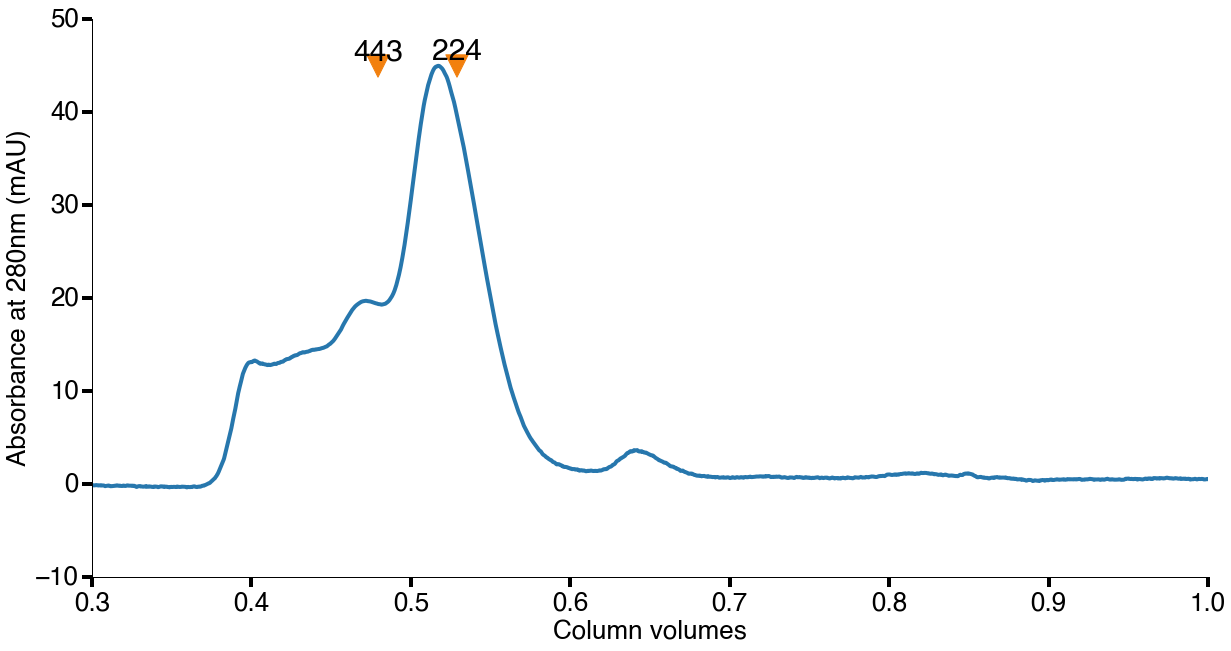

In [6]:
fig,ax = plt.subplots(figsize=(20,10))
s200=pd.read_csv('../data/DAB2-Batch5/18Sept27_DABS200/18Sept27_DAB_S200Inrease_Cleaned.csv')
cv = s200['UV 1_280_ml']/2.4
plt.plot(cv,s200['UV 1_280_mAU'],label='UV 280', color=colors[1],lw=4)
#     plt.plot(s200['UV 2_485_ml'],s200['UV 2_485_mAU'],label='UV 485')
plt.xlim(0,max(cv))
plt.ylabel('Absorbance at 280nm (mAU)',fontsize=26)
plt.xlabel('Column volumes',fontsize=26)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xlim(0.3,1)
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

peak=s200['UV 1_280_ml'][s200['UV 1_280_mAU']==max(s200['UV 1_280_mAU'])].iloc[0]/2.4
bX=1.15/2.4
bY=443
lX=1.27/2.4
lY=224
slope=(lY-bY)/(lX-bX)
kDa = bY+slope*(peak-bX)
peak_height = s200[s200['UV 1_280_ml']==peak*2.4]['UV 1_280_mAU'].iloc[0]
plt.scatter([bX,lX],[peak_height]*2,s = 500,marker='v',color=colors[7])

plt.text(bX,peak_height,'%d'%bY,ha='center',va='bottom')
plt.text(lX,peak_height,'%d'%lY,ha='center',va='bottom')


# plt.axvline(peak,label=kDa,c='g')

# plt.axvline(bX,label=bY,c='r')
# plt.axvline(lX,label=lY,c='k')

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# plt.ylim(-0.5,50)

# plt.legend()
    
plt.savefig('fig4/fig4PanelS3.eps',
           format='eps',bbox_inches='tight')
plt.show()

In [7]:
[peak_height]*2

[44.955975000000002, 44.955975000000002]

In [8]:
peak

0.51755458333333326